In [1]:
import  pandas as pd 
import numpy as np 
import sklearn
from sklearn.metrics import accuracy_score , f1_score , recall_score ,roc_auc_score as roc 
atributes = [ 'Class', 'age', 'menopause', 'tumor-size' ,'inv-nodes', 'node-caps', 'deg-malig' ,'breast', 'breast-quad', 'irradiat']
missing = [np.nan , None , "" , "?"]
df = pd.read_csv('./data/breast-cancer.csv', names=atributes, na_values=missing) 
print(df.head())



                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [2]:
df.corr()

,deg-malig
deg-malig,1.0


In [3]:


for i in df:
    print("sum of nans in {} : {} ".format(i,df[i].isna().sum() ))
print(df)

## convert ages 
ages = []
for row in df["age"]:
    if row == "20-29":
        ages.append(0)
    elif row == "30-39":
        ages.append(1)
    elif row == "40-49":
        ages.append(2)
    elif row == "50-59":
        ages.append(3)
    elif row == "60-69":
        ages.append(4)
    elif row == "70-79":
        ages.append(5)
    else :
        ages.append(6)
ages_df = pd.DataFrame(ages)


df["age"] = ages_df
sizes_table = []
for row in df["tumor-size"]:
#     print(row)
    if row == '0-4':
        sizes_table.append(0)
    elif row == '5-9':
        sizes_table.append(1)
    elif row == '10-14':
        sizes_table.append(2)
    elif row == '15-19':
        sizes_table.append(3)
    elif row == '20-24':
        sizes_table.append(4)
    elif row == '25-29':
        sizes_table.append(5)
    elif row == '30-34':
        sizes_table.append(6)       
    elif row == '35-39':
        sizes_table.append(7)       
    elif row == '40-44':
        sizes_table.append(8)
    elif row == '45-49':
        sizes_table.append(9)
    elif row == '50-54' :
        sizes_table.append(10)

        
sizes_table_df = pd.DataFrame(sizes_table)
df["tumor-size"] = sizes_table_df


### gia inv-nodes
table = []
for row in df["inv-nodes"]:
#     print(row)
    if row == '0-2':
        table.append(0)
    elif row == '3-5':
        table.append(1)
    elif row == '6-8':
        table.append(2)
    elif row == '9-11':
        table.append(3)
    elif row == '12-14':
        table.append(4)
    elif row == '15-17':
        table.append(5)
    elif row == '24-26':
        table.append(6)       
        

table_df = pd.DataFrame(table)
df["inv-nodes"] = table_df

sum of nans in Class : 0 
sum of nans in age : 0 
sum of nans in menopause : 0 
sum of nans in tumor-size : 0 
sum of nans in inv-nodes : 0 
sum of nans in node-caps : 8 
sum of nans in deg-malig : 0 
sum of nans in breast : 0 
sum of nans in breast-quad : 1 
sum of nans in irradiat : 0 
                    Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence

In [4]:
dummie_df = pd.get_dummies(df , columns = ['menopause' , 'node-caps' ,'breast' ,'breast-quad','irradiat'  ] , drop_first=True )

In [5]:
dummie_df


,Class,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,no-recurrence-events,1,6,0,3,0,1,0,0,1,0,0,0,0
1,no-recurrence-events,2,4,0,2,0,1,0,1,0,0,0,1,0
2,no-recurrence-events,2,4,0,2,0,1,0,0,1,0,0,0,0
3,no-recurrence-events,4,3,0,2,0,0,0,1,0,1,0,0,0
4,no-recurrence-events,2,0,0,2,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,6,0,2,0,1,0,0,0,1,0,0,0
282,recurrence-events,1,4,0,3,0,1,0,0,0,1,0,0,1
283,recurrence-events,4,4,0,1,0,0,0,1,0,1,0,0,0
284,recurrence-events,2,6,1,3,0,0,0,0,1,0,0,0,0


In [6]:
dummie_df["Class"] = dummie_df["Class"].replace("no-recurrence-events", 0)
dummie_df["Class"] = dummie_df["Class"].replace("recurrence-events", 1)

In [7]:
dummie_df.corr()

,Class,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
Class,1.000000,-0.071719,0.175065,0.276171,0.299400,-0.003982,0.052386,0.276792,-0.058646,0.036290,-0.045711,-0.031259,0.076444,0.193912
age,-0.071719,1.000000,-0.010559,-0.044726,-0.085968,0.052639,-0.718478,-0.054111,-0.041769,0.013684,0.055275,-0.086699,-0.031672,-0.042080
tumor-size,0.175065,-0.010559,1.000000,0.168944,0.218169,-0.066389,0.012763,0.203942,0.049763,0.003682,0.068617,-0.126855,0.160984,0.164418
inv-nodes,0.276171,-0.044726,0.168944,1.000000,0.332824,-0.073946,-0.016564,0.596347,-0.021130,0.026433,-0.007967,0.052110,-0.000759,0.324621
deg-malig,0.299400,-0.085968,0.218169,0.332824,1.000000,-0.071934,-0.031758,0.325930,-0.052861,-0.013504,0.052634,-0.037217,0.020563,0.208099
menopause_lt40,-0.003982,0.052639,-0.066389,-0.073946,-0.071934,1.000000,-0.166350,-0.078159,-0.058030,0.014311,0.029915,-0.047940,0.013621,-0.088465
menopause_premeno,0.052386,-0.718478,0.012763,-0.016564,-0.031758,-0.166350,1.000000,0.046392,0.066228,0.004428,-0.057294,0.086174,0.059001,0.054859
node-caps_yes,0.276792,-0.054111,0.203942,0.596347,0.325930,-0.078159,0.046392,1.000000,-0.004198,-0.009752,-0.018482,0.009556,0.070010,0.303955
breast_right,-0.058646,-0.041769,0.049763,-0.021130,-0.052861,-0.058030,0.066228,-0.004198,1.000000,-0.281404,0.230183,-0.107272,0.187264,0.018761
breast-quad_left_low,0.036290,0.013684,0.003682,0.026433,-0.013504,0.014311,0.004428,-0.009752,-0.281404,1.000000,-0.566363,-0.239274,-0.285520,0.031167


### SPLIT

In [8]:

from sklearn.model_selection import train_test_split
data  = dummie_df.drop(columns='Class')
# for i in full_dataset:
#     print(full_dataset[i])

res = dummie_df["Class"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.5,random_state=30) # 80% training and 20% test

### train the algorithms 

In [9]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf.fit(X_train ,y_train)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear') 
svm_lin.fit(X_train, y_train)

# SVM kerner = rbf 
svm_rbf = SVC(kernel= 'rbf')
svm_rbf.fit(X_train, y_train)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors=2 )
knn.fit(X_train, y_train)


C:\Users\tzav2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### print ACCURACIES 

In [10]:
list_of_models = [clf, knn,svm_lin, svm_rbf   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_origin={}
AUC_origin = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred = i.predict(X_test)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test , y_pred) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test, y_pred)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test, y_pred)))
    print("recall score for {} : {} ".format(names[j] , recall_score(y_test , y_pred)))
    accuracy_from_origin[names[j]]= accuracy_score(y_test,y_pred)
    AUC_origin[names[j]] = roc(y_test,y_pred)

Accuracy score for RF :    0.6783216783216783
F1 score for : RF :        0.25806451612903225
auc curve accuracy for RF :  0.5380232558139534 
recall score for RF : 0.18604651162790697 
Accuracy score for KNN :    0.7062937062937062
F1 score for : KNN :        0.22222222222222218
auc curve accuracy for KNN :  0.5447674418604651 
recall score for KNN : 0.13953488372093023 
Accuracy score for SVM (linear) :    0.6713286713286714
F1 score for : SVM (linear) :        0.3380281690140845
auc curve accuracy for SVM (linear) :  0.5595348837209302 
recall score for SVM (linear) : 0.27906976744186046 
Accuracy score for SVM(RBF) :    0.6853146853146853
F1 score for : SVM(RBF) :        0.1176470588235294
auc curve accuracy for SVM(RBF) :  0.5098837209302325 
recall score for SVM(RBF) : 0.06976744186046512 


In [11]:
#over sample the set 
accuracy_from_origin.values()

dict_values([0.6783216783216783, 0.7062937062937062, 0.6713286713286714, 0.6853146853146853])

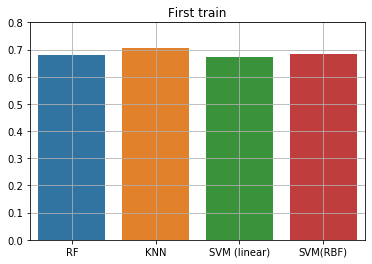

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(  list ( accuracy_from_origin.keys() ) , list(accuracy_from_origin.values()) )
plt.ylim([0,0.8])
plt.title('First train')
plt.grid()

## OVER SAMPLING with SMOTE

In [13]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
oversampling = SMOTE()
data_over , res_over = oversampling.fit_resample(data ,res )
Counter(res_over)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 80% training and 20% test

In [14]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf_smote = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf_smote.fit(X_train_smote ,y_train_smote)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin_smote = SVC(kernel='linear') 
svm_lin_smote.fit(X_train_smote, y_train_smote)

# SVM kerner = rbf 
svm_rbf_smote = SVC(kernel= 'rbf')
svm_rbf_smote.fit(X_train_smote, y_train_smote)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn_smote = KNeighborsClassifier( n_neighbors=2 )
knn_smote.fit(X_train_smote, y_train_smote)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### accuracies after over sampling with smote

In [15]:
list_of_models = [clf_smote, knn_smote,svm_lin_smote, svm_rbf_smote   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_SMOTE = {}
AUC_SMOTE = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred_smote = i.predict(X_test_smote)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test_smote , y_pred_smote) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test_smote, y_pred_smote)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test_smote, y_pred_smote)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test_smote , y_pred_smote)))
    accuracy_from_SMOTE[names[j]]= accuracy_score(y_test_smote,y_pred_smote)
    AUC_SMOTE[names[j]] = roc(y_test_smote,y_pred_smote)
    

Accuracy score for RF :    0.7283950617283951
F1 score for : RF :        0.7659574468085106
auc curve accuracy for RF :  0.7265243902439025 
recall score for RF :     0.8780487804878049 
Accuracy score for KNN :    0.7530864197530864
F1 score for : KNN :        0.761904761904762
auc curve accuracy for KNN :  0.7527439024390243 
recall score for KNN :     0.7804878048780488 
Accuracy score for SVM (linear) :    0.6419753086419753
F1 score for : SVM (linear) :        0.6813186813186813
auc curve accuracy for SVM (linear) :  0.640548780487805 
recall score for SVM (linear) :     0.7560975609756098 
Accuracy score for SVM(RBF) :    0.654320987654321
F1 score for : SVM(RBF) :        0.6744186046511628
auc curve accuracy for SVM(RBF) :  0.6536585365853659 
recall score for SVM(RBF) :     0.7073170731707317 


Text(0.5, 1.0, 'SMOTE & ONE HOT ')

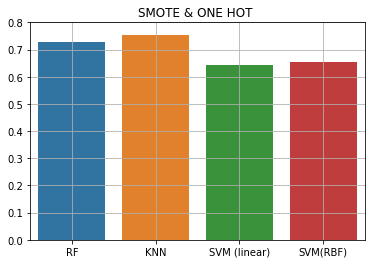

In [16]:
sns.barplot(  list ( accuracy_from_SMOTE.keys() ) , list(accuracy_from_SMOTE.values()) )
plt.ylim([0,0.8])
plt.grid()
plt.title('SMOTE & ONE HOT ')

##  OVER SAMPLING WITH RandomOverSampler 

In [17]:
# random overampler 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
data_over , res_over = ros.fit_resample(data ,res )
Counter(res_over)
X_train, X_test, y_train, y_test = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 80% training and 20% test

In [18]:
list_of_models = [clf, knn,svm_lin, svm_rbf   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_R = {}
AUC_R = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred = i.predict(X_test)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test , y_pred) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test, y_pred)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test, y_pred)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test , y_pred)))
    accuracy_from_R[names[j]]= accuracy_score(y_test,y_pred)
    AUC_R[names[j]] = roc(y_test,y_pred)
    

Accuracy score for RF :    0.7037037037037037
F1 score for : RF :        0.6129032258064516
auc curve accuracy for RF :  0.7067073170731707 
recall score for RF :     0.4634146341463415 
Accuracy score for KNN :    0.5308641975308642
F1 score for : KNN :        0.1739130434782609
auc curve accuracy for KNN :  0.536280487804878 
recall score for KNN :     0.0975609756097561 
Accuracy score for SVM (linear) :    0.5925925925925926
F1 score for : SVM (linear) :        0.4590163934426229
auc curve accuracy for SVM (linear) :  0.5957317073170733 
recall score for SVM (linear) :     0.34146341463414637 
Accuracy score for SVM(RBF) :    0.5308641975308642
F1 score for : SVM(RBF) :        0.1739130434782609
auc curve accuracy for SVM(RBF) :  0.536280487804878 
recall score for SVM(RBF) :     0.0975609756097561 


Text(0.5, 1.0, 'RandomSampler & ONE HOT')

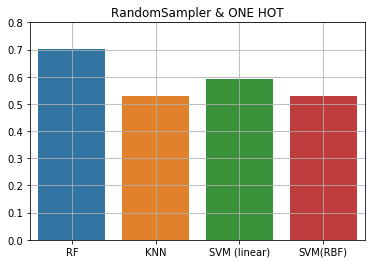

In [19]:
sns.barplot(  list ( accuracy_from_R.keys() ) , list(accuracy_from_R.values()) )
plt.ylim([0,0.8])
plt.grid()
plt.title('RandomSampler & ONE HOT')

# NEXT WITHOUT  One Hot Encoding 

In [20]:
dataset2 = pd.read_csv('./data/final.csv')
dataset2.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
Class,1.000000,-0.071719,-0.048973,0.175065,0.276171,0.032237,0.299400,-0.058646,0.081557
age,-0.071719,1.000000,0.671116,-0.010559,-0.044726,0.118816,-0.085968,-0.041769,0.017227
menopause,-0.048973,0.671116,1.000000,-0.030419,-0.005769,0.193316,0.008678,-0.076891,0.054491
tumor-size,0.175065,-0.010559,-0.030419,1.000000,0.168944,-0.008134,0.218169,0.049763,0.014709
inv-nodes,0.276171,-0.044726,-0.005769,0.168944,1.000000,0.138537,0.332824,-0.021130,-0.032011
node-caps,0.032237,0.118816,0.193316,-0.008134,0.138537,1.000000,-0.093758,-0.074410,-0.013530
deg-malig,0.299400,-0.085968,0.008678,0.218169,0.332824,-0.093758,1.000000,-0.052861,0.072195
breast,-0.058646,-0.041769,-0.076891,0.049763,-0.021130,-0.074410,-0.052861,1.000000,-0.039301
breast-quad,0.081557,0.017227,0.054491,0.014709,-0.032011,-0.013530,0.072195,-0.039301,1.000000


### read from final 

In [21]:
dataset2

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,0,6,0,0,3,0,0
1,0,2,0,4,0,0,2,1,1
2,0,2,0,4,0,0,2,0,0
3,0,4,1,3,0,0,2,1,2
4,0,2,0,0,0,0,2,1,3
...,...,...,...,...,...,...,...,...,...
281,1,1,0,6,0,0,2,0,2
282,1,1,0,4,0,0,3,0,2
283,1,4,1,4,0,0,1,1,2
284,1,2,1,6,1,0,3,0,0


## split 

In [22]:
from sklearn.model_selection import train_test_split
data_train  = dataset2.drop(columns='Class')
# for i in full_dataset:
#     print(full_dataset[i])

res_class = dataset2["Class"]

# Split dataset into training set and test set
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(data_train, res_class, test_size=0.5,random_state=30) # 80% training and 20% test

## TRAIN DATA WITHOUT ONE HOT 

In [23]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf_rfc = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf_rfc.fit(X_train_without ,y_train_without)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin_without = SVC(kernel='linear') 
svm_lin_without.fit(X_train_without, y_train_without)

# SVM kerner = rbf 
svm_rbf_without = SVC(kernel= 'rbf')
svm_rbf_without.fit(X_train_without, y_train_without)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn_without = KNeighborsClassifier( n_neighbors=2 )
knn_without.fit(X_train_without, y_train_without)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [24]:
list_of_models = [clf_rfc, knn_without,svm_lin_without, svm_rbf_without   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_R_without = {}
AUC_R_without = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred_without = i.predict(X_test_without)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test_without , y_pred_without) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test_without, y_pred_without)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test_without, y_pred_without)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test_without , y_pred_without)))
    accuracy_from_R_without[names[j]]= accuracy_score(y_test_without,y_pred_without)
    AUC_R_without[names[j]] = roc(y_test_without,y_pred_without)
    

Accuracy score for RF :    0.6573426573426573
F1 score for : RF :        0.3098591549295775
auc curve accuracy for RF :  0.542906976744186 
recall score for RF :     0.2558139534883721 
Accuracy score for KNN :    0.6993006993006993
F1 score for : KNN :        0.18867924528301888
auc curve accuracy for KNN :  0.5331395348837209 
recall score for KNN :     0.11627906976744186 
Accuracy score for SVM (linear) :    0.7062937062937062
F1 score for : SVM (linear) :        0.22222222222222218
auc curve accuracy for SVM (linear) :  0.5447674418604651 
recall score for SVM (linear) :     0.13953488372093023 
Accuracy score for SVM(RBF) :    0.6993006993006993
F1 score for : SVM(RBF) :        0.0
auc curve accuracy for SVM(RBF) :  0.5 
recall score for SVM(RBF) :     0.0 


Text(0.5, 1.0, 'Without ONE HOT train ')

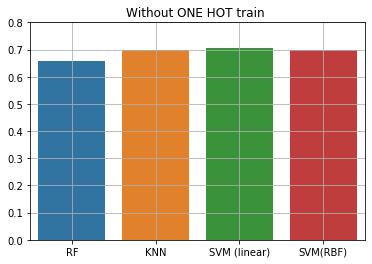

In [25]:
sns.barplot(  list ( accuracy_from_R_without.keys() ) , list(accuracy_from_R_without.values()) )
plt.ylim([0,0.8])
plt.grid()
plt.title('Without ONE HOT train ')

## TRAIN WITH OVER SAMPLE  SMOTE 


In [26]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
oversampling_smote = SMOTE()
data_over_w , res_over_w = oversampling_smote.fit_resample(data_train ,res_class )
X_train_smote_w, X_test_smote_w, y_train_smote_w, y_test_smote_w = train_test_split(data_over_w, res_over_w, test_size=0.2,random_state=30) # 80% training and 20% test

In [27]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf_smote_w = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf_smote_w.fit(X_train_smote_w ,y_train_smote_w)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin_smote_w = SVC(kernel='linear') 
svm_lin_smote_w.fit(X_train_smote_w, y_train_smote_w)

# SVM kerner = rbf 
svm_rbf_smote_w = SVC(kernel= 'rbf')
svm_rbf_smote_w.fit(X_train_smote_w, y_train_smote_w)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn_smote_w = KNeighborsClassifier( n_neighbors=2 )
knn_smote_w.fit(X_train_smote_w, y_train_smote_w)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [28]:
list_of_models = [clf_smote_w , knn_smote_w,svm_lin_smote_w, svm_rbf_smote_w   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_without_smote = {}
AUC_R_without_smote = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred_smote_w = i.predict(X_test_smote_w)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test_smote_w , y_pred_smote_w) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test_smote_w, y_pred_smote_w)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test_smote_w, y_pred_smote_w)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test_smote_w , y_pred_smote_w)))
    accuracy_from_without_smote[names[j]]= accuracy_score(y_test_smote_w,y_pred_smote_w)
    AUC_R_without_smote[names[j]] = roc(y_test_smote_w,y_pred_smote_w)

Accuracy score for RF :    0.6419753086419753
F1 score for : RF :        0.6666666666666667
auc curve accuracy for RF :  0.6411585365853658 
recall score for RF :     0.7073170731707317 
Accuracy score for KNN :    0.5925925925925926
F1 score for : KNN :        0.5217391304347826
auc curve accuracy for KNN :  0.5945121951219512 
recall score for KNN :     0.43902439024390244 
Accuracy score for SVM (linear) :    0.5061728395061729
F1 score for : SVM (linear) :        0.5555555555555556
auc curve accuracy for SVM (linear) :  0.5048780487804878 
recall score for SVM (linear) :     0.6097560975609756 
Accuracy score for SVM(RBF) :    0.6790123456790124
F1 score for : SVM(RBF) :        0.6829268292682927
auc curve accuracy for SVM(RBF) :  0.6789634146341464 
recall score for SVM(RBF) :     0.6829268292682927 


Text(0.5, 1.0, 'SMOTE without ONE HOT')

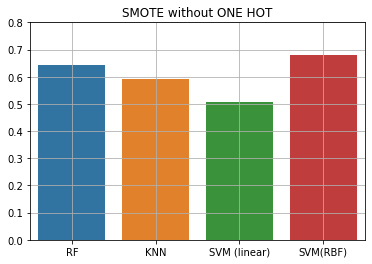

In [29]:
sns.barplot(  list ( accuracy_from_without_smote.keys() ) , list(accuracy_from_without_smote.values()) )
plt.ylim([0,0.8])
plt.grid()
plt.title('SMOTE without ONE HOT')

## random over sampler without ONE HOT 

In [30]:
# random overampler 
from imblearn.over_sampling import RandomOverSampler
ros_without = RandomOverSampler(random_state = 0)
data_over , res_over = ros_without.fit_resample(data_train ,res_class )
X_train_r_w, X_test_r_w, y_train_r_w, y_test_r_w = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 80% training and 20% test

In [31]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf_r_w = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf_r_w.fit(X_train_r_w ,y_train_r_w)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin_r_w = SVC(kernel='linear') 
svm_lin_r_w.fit(X_train_r_w, y_train_r_w)

# SVM kerner = rbf 
svm_rbf_r_w = SVC(kernel= 'rbf')
svm_rbf_r_w.fit(X_train_r_w, y_train_r_w)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn_r_w = KNeighborsClassifier( n_neighbors=2 )
knn_r_w.fit(X_train_r_w, y_train_r_w)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [32]:
list_of_models = [clf_r_w , knn_r_w,svm_lin_r_w, svm_rbf_r_w   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_w_r = {}
AUC_R_w_r = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred_r_w = i.predict(X_test_r_w)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test_r_w , y_pred_r_w) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test_r_w, y_pred_r_w)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test_r_w, y_pred_r_w)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test_r_w , y_pred_r_w)))
    accuracy_from_w_r[names[j]]= accuracy_score(y_test_r_w,y_pred_r_w)
    AUC_R_w_r[names[j]] = roc(y_test_r_w,y_pred_r_w)

Accuracy score for RF :    0.7777777777777778
F1 score for : RF :        0.7954545454545454
auc curve accuracy for RF :  0.7768292682926828 
recall score for RF :     0.8536585365853658 
Accuracy score for KNN :    0.6666666666666666
F1 score for : KNN :        0.6301369863013699
auc curve accuracy for KNN :  0.6679878048780489 
recall score for KNN :     0.5609756097560976 
Accuracy score for SVM (linear) :    0.5802469135802469
F1 score for : SVM (linear) :        0.5641025641025641
auc curve accuracy for SVM (linear) :  0.5807926829268293 
recall score for SVM (linear) :     0.5365853658536586 
Accuracy score for SVM(RBF) :    0.6172839506172839
F1 score for : SVM(RBF) :        0.5373134328358209
auc curve accuracy for SVM(RBF) :  0.6195121951219512 
recall score for SVM(RBF) :     0.43902439024390244 


Text(0.5, 1.0, 'RANDOM OVER SAMPLER WITHOUT ONE HOT')

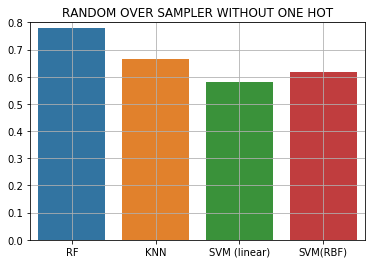

In [33]:
sns.barplot(  list ( accuracy_from_w_r.keys() ) , list(accuracy_from_w_r.values()) )
plt.ylim([0,0.8])
plt.grid()
plt.title('RANDOM OVER SAMPLER WITHOUT ONE HOT')

In [34]:
accuracy_from_w_r.values()

dict_values([0.7777777777777778, 0.6666666666666666, 0.5802469135802469, 0.6172839506172839])

In [35]:
#CREATE DF FOR PLOT 
smote_random_without_df = pd.DataFrame()

In [36]:
smote_random_without_df['algorithms'] = ['clf', 'knn', 'svm_linear', 'svm_rbf' ]  

In [52]:
smote_random_without_df['SMOTE'] = accuracy_from_without_smote.values()
smote_random_without_df['RandomSampler'] = accuracy_from_w_r.values()
smote_random_without_df['Original Set'] = accuracy_from_R_without.values()

In [53]:
smote_random_without_df

,algorithms,SMOTE,RandomSampler,Original Set
0,clf,0.641975,0.777778,0.657343
1,knn,0.592593,0.666667,0.699301
2,svm_linear,0.506173,0.580247,0.706294
3,svm_rbf,0.679012,0.617284,0.699301


[Text(0, 0, 'clf'),
 Text(0, 0, 'knn'),
 Text(0, 0, 'svm_linear'),
 Text(0, 0, 'svm_rbf')]

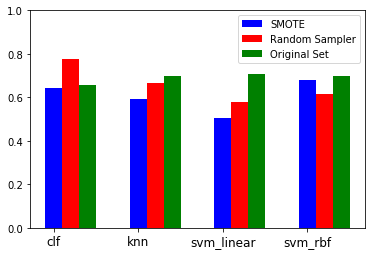

In [56]:
import sys
ax = plt.subplot(111)
x= [2,4,6,8]

bar1 = ax.bar(x , smote_random_without_df['SMOTE'], color='b' ,width=0.4)
bar2= ax.bar([2.4,4.4,6.4,8.4], smote_random_without_df['RandomSampler'], color= 'r', width=0.4 )
bar3 = ax.bar([2.8,4.8,6.8,8.8], smote_random_without_df['Original Set'], color= 'g', width=0.4 )

plt.ylim([0,1])
plt.legend(['SMOTE', 'Random Sampler', 'Original Set'])
ax.set_xticks(x)
ax.set_xticklabels(smote_random_without_df['algorithms'], fontsize = 12)